## Add the machine learning library to the path

In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
pd.options.display.max_columns=1000
pd.set_option('display.max_colwidth', -1)
sys.path.insert(0, "C:\\Users\\vberlia\\Documents\\machine_learning")

## Load the libraries

In [2]:
from machineLearning.dataSummary import DataSummary
from machineLearning.visualizations import Visualization
from machineLearning.missingValues import MissingValue
from machineLearning.models import Model
from machineLearning.modelInputs import KNNInputs
from machineLearning.pipelines import Pipelines
import numpy as np


## Read the data

In [3]:
data=pd.read_csv("C:/Users/vberlia/Documents/data_diabetes.txt")

## Show data sample

In [4]:
data.head()

,num_of_tms preg,plasma_glucose,dstb,trcps_skin_thickness,serum_insulin,bmi,dbts_pedigree_func,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Correlation Matrix

In [5]:
data.corr()

,num_of_tms preg,plasma_glucose,dstb,trcps_skin_thickness,serum_insulin,bmi,dbts_pedigree_func,age,class
num_of_tms preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma_glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
dstb,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
trcps_skin_thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
serum_insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
dbts_pedigree_func,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## This dataset contains missing values encoded as zero hence replacing with None

In [6]:
# Locate missing value and replace with None
dataNew=MissingValue.replaceValuesInColumns(columns=['serum_insulin','bmi','dstb','trcps_skin_thickness','plasma_glucose'],data=data,replace_with_val=None,val_to_replace=0)

## Missing values has now been encoded as None

In [7]:
dataNew.head()

,num_of_tms preg,plasma_glucose,dstb,trcps_skin_thickness,serum_insulin,bmi,dbts_pedigree_func,age,class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


## Showing the summary of the data

In [8]:
DataSummary.returnSummaryDataFrame(data).transpose()

,col_type,count_unique,values,missing_count,count,mean,std,min,25%,50%(median),75%,max
num_of_tms preg,int64,17,[ 6. 1. 8. 0. 5. 3. 10. 2. 4. 7. 9. 11. 13. 15. 17. 12. 14.],0,768,3.84505,3.36958,0,1,3,6,17
plasma_glucose,int64,136,[148. 85. 183. 89. 137. 116. 78. 115. 197. 125. 110. 168. 139. 189.\n 166. 100. 118. 107. 103. 126. 99. 196. 119. 143. 147. 97. 145. 117.\n 109. 158. 88. 92. 122. 138. 102. 90. 111. 180. 133. 106. 171. 159.\n 146. 71. 105. 101. 176. 150. 73. 187. 84. 44. 141. 114. 95. 129.\n 79. 0. 62. 131. 112. 113. 74. 83. 136. 80. 123. 81. 134. 142.\n 144. 93. 163. 151. 96. 155. 76. 160. 124. 162. 132. 120. 173. 170.\n 128. 108. 154. 57. 156. 153. 188. 152. 104. 87. 75. 179. 130. 194.\n 181. 135. 184. 140. 177. 164. 91. 165. 86. 193. 191. 161. 167. 77.\n 182. 157. 178. 61. 98. 127. 82. 72. 172. 94. 175. 195. 68. 186.\n 198. 121. 67. 174. 199. 56. 169. 149. 65. 190.],0,768,120.895,31.9726,0,99,117,140.25,199
dstb,int64,47,[ 72. 66. 64. 40. 74. 50. 0. 70. 96. 92. 80. 60. 84. 30.\n 88. 90. 94. 76. 82. 75. 58. 78. 68. 110. 56. 62. 85. 86.\n 48. 44. 65. 108. 55. 122. 54. 52. 98. 104. 95. 46. 102. 100.\n 61. 24. 38. 106. 114.],0,768,69.1055,19.3558,0,62,72,80,122
trcps_skin_thickness,int64,51,[35. 29. 0. 23. 32. 45. 19. 47. 38. 30. 41. 33. 26. 15. 36. 11. 31. 37.\n 42. 25. 18. 24. 39. 27. 21. 34. 10. 60. 13. 20. 22. 28. 54. 40. 51. 56.\n 14. 17. 50. 44. 12. 46. 16. 7. 52. 43. 48. 8. 49. 63. 99.],0,768,20.5365,15.9522,0,0,23,32,99
serum_insulin,int64,186,[ 0. 94. 168. 88. 543. 846. 175. 230. 83. 96. 235. 146. 115. 140.\n 110. 245. 54. 192. 207. 70. 240. 82. 36. 23. 300. 342. 304. 142.\n 128. 38. 100. 90. 270. 71. 125. 176. 48. 64. 228. 76. 220. 40.\n 152. 18. 135. 495. 37. 51. 99. 145. 225. 49. 50. 92. 325. 63.\n 284. 119. 204. 155. 485. 53. 114. 105. 285. 156. 78. 130. 55. 58.\n 160. 210. 318. 44. 190. 280. 87. 271. 129. 120. 478. 56. 32. 744.\n 370. 45. 194. 680. 402. 258. 375. 150. 67. 57. 116. 278. 122. 545.\n 75. 74. 182. 360. 215. 184. 42. 132. 148. 180. 205. 85. 231. 29.\n 68. 52. 255. 171. 73. 108. 43. 167. 249. 293. 66. 465. 89. 158.\n 84. 72. 59. 81. 196. 415. 275. 165. 579. 310. 61. 474. 170. 277.\n 60. 14. 95. 237. 191. 328. 250. 480. 265. 193. 79. 86. 326. 188.\n 106. 65. 166. 274. 77. 126. 330. 600. 185. 25. 41. 272. 321. 144.\n 15. 183. 91. 46. 440. 159. 540. 200. 335. 387. 22. 291. 392. 178.\n 127. 510. 16. 112.],0,768,79.7995,115.244,0,0,30.5,127.25,846
bmi,float64,248,[33.6 26.6 23.3 28.1 43.1 25.6 31. 35.3 30.5 0. 37.6 38. 27.1 30.1\n 25.8 30. 45.8 29.6 43.3 34.6 39.3 35.4 39.8 29. 36.6 31.1 39.4 23.2\n 22.2 34.1 36. 31.6 24.8 19.9 27.6 24. 33.2 32.9 38.2 37.1 34. 40.2\n 22.7 45.4 27.4 42. 29.7 28. 39.1 19.4 24.2 24.4 33.7 34.7 23. 37.7\n 46.8 40.5 41.5 25. 25.4 32.8 32.5 42.7 19.6 28.9 28.6 43.4 35.1 32.\n 24.7 32.6 43.2 22.4 29.3 24.6 48.8 32.4 38.5 26.5 19.1 46.7 23.8 33.9\n 20.4 28.7 49.7 39. 26.1 22.5 39.6 29.5 34.3 37.4 33.3 31.2 28.2 53.2\n 34.2 26.8 55. 42.9 34.5 27.9 38.3 21.1 33.8 30.8 36.9 39.5 27.3 21.9\n 40.6 47.9 50. 25.2 40.9 37.2 44.2 29.9 31.9 28.4 43.5 32.7 67.1 45.\n 34.9 27.7 35.9 22.6 33.1 30.4 52.3 24.3 22.9 34.8 30.9 40.1 23.9 37.5\n 35.5 42.8 42.6 41.8 35.8 37.8 28.8 23.6 35.7 36.7 45.2 44. 46.2 35.\n 43.6 44.1 18.4 29.2 25.9 32.1 36.3 40. 25.1 27.5 45.6 27.8 24.9 25.3\n 37.9 27. 26. 38.7 20.8 36.1 30.7 32.3 52.9 21. 39.7 25.5 26.2 19.3\n 38.1 23.5 45.5 23.1 39.9 36.8 21.8 41. 42.2 34.4 27.2 36.5 29.8 39.2\n 38.4 36.2 48.3 20. 22.3 45.7 23.7 22.1 42.1 42.4 18.2 26.4 45.3 37.\n 24.5 32.2 59.4 21.2 26.7 30.2 46.1 41.3 38.8 35.2 42.3 40.7 46.5 33.5\n 37.3 30.3 26.3 21.7 36.4 28.5 26.9 38.6 31.3 19.5 20.1 40.8 23.4 28.3\n 38.9 57.3 35.6 49.6 44.6 24.1 44.5 41.2 49.3 46.3],0,768,31.9926,7.88416,0,27.3,32,36.6,67.1
dbts_pedigree_func,float64,517,[0.627 0.351 0.672 0.167 2.288 0.201 0.248 0.134 0.158 0.232 0.191 0.537\n 1.441 0.398 0.587 0.484 0.551 0.254 0.183 0.529 0.704 0.388 0.451 0.263\n 0.205 0.257 0.487 0.245 0.337 0.546 0.851 0.267 0.188 0.512 0.966 0.42\n 0.665 0.503 1.39 0.27

## Visualizing the plasma glucose,dstb,bmi distribution against the target variable  

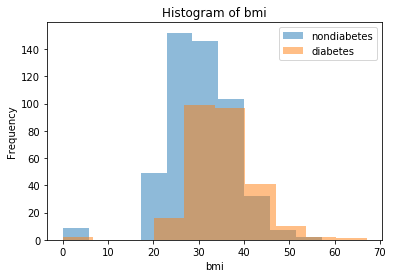

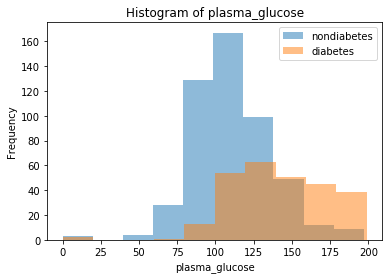

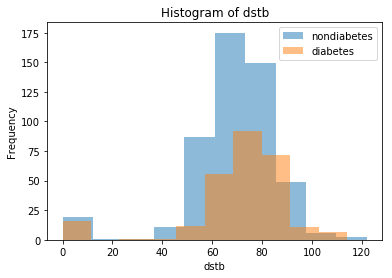

In [9]:
columns=['bmi','plasma_glucose','dstb']
Visualization.createHistPlotForVarsForBinaryClass(columns=columns,data=data,label_column='class',one_meaning='diabetes',zero_meaning='nondiabetes')

## Seeing the frequency for num of times pregnant patient and the target variable 

In [10]:
DataSummary.returnFrequencyCounts(columns=["num_of_tms preg","class"],data=data)

{'class':    class  count
 0  0      500  
 1  1      268  , 'num_of_tms preg':     num_of_tms preg  count
 0   1                135  
 1   0                111  
 2   2                103  
 3   3                75   
 4   4                68   
 5   5                57   
 6   6                50   
 7   7                45   
 8   8                38   
 9   9                28   
 10  10               24   
 11  11               11   
 12  13               10   
 13  12               9    
 14  14               2    
 15  15               1    
 16  17               1    }

## Removing the rows with missing values(complete case analysis)

In [11]:
droppedData=MissingValue.dropMissingValuesInSpecificColumns(data=dataNew,complete=True)

## Almost 50 % of the data has been thrown out by this approach.

In [12]:
droppedData.shape

(392, 9)

## Showing change in mean after removing missing value rows

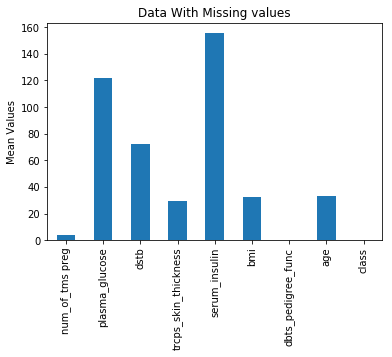

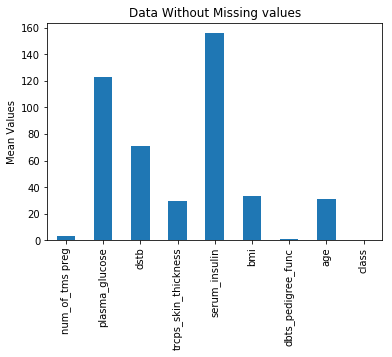

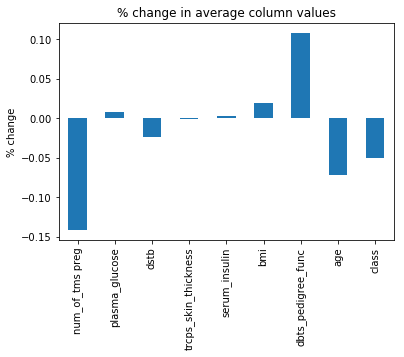

In [13]:
Visualization.createBarPlotSingleVar(pandasSeries=dataNew.mean(),title='Data With Missing values',y_label='Mean Values')
Visualization.createBarPlotSingleVar(pandasSeries=droppedData.mean(),title='Data Without Missing values',y_label='Mean Values')
Visualization.createBarPlotSingleVar(pandasSeries=(droppedData.mean() - dataNew.mean()) /dataNew.mean(),title='% change in average column values',y_label='% change')

## Fitting KNN on trimmed data

In [14]:
X=droppedData.drop('class',axis=1)
Y=droppedData['class']


knnmodel=KNNInputs(X,Y,50)

models={'KNN':knnmodel}

allModels=Model()
df,model_results=allModels.fitModels(models)

## It turns out that the best k=25 has accuracy of 75.2%

In [15]:
df

,best_k,knn_accuracy
KNN,{'n_neighbors': 25},0.752551


## Showing the bar-plot of accuracy values for different values of k(1-50)

KNN Performance


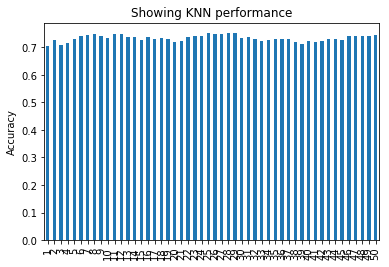

In [16]:
Visualization.visualizeModels(model_results)

## Imputing missing values with mean

In [17]:
imputer, meanValues, dataTransformed=MissingValue.imupteMissingWithMeanValues(data=dataNew)

In [18]:
X=dataTransformed.drop('class',axis=1)
Y=dataTransformed['class']
knnmodel=KNNInputs(X,Y,50)
models={'KNN':knnmodel}
allModels=Model()
df,model_results=allModels.fitModels(models)

## It turns out that the best k=8 has accuracy of 73.8% for imputed with mean data

In [19]:
df

,best_k,knn_accuracy
KNN,{'n_neighbors': 8},0.738281


### Warning: In this(above and below) method the missing value is being imputed before splitting it into train and test or before cross-validation which violates the fundamental principles of machine learning. So the results may be overoptimistic.

## Fitting KNN for three different missing strategy where imputing is done on the whole data and then split into train and test(using 3 fold CV internally)

In [20]:
strategies = ['complete_case', 'mean', 'median']

## Median and mean both are giving same value of accuracy(73.2 %) for k=8 but as stated above the value may be biased.

C:\Users\vberlia\Documents\machine_learning\machineLearning\models.py:55: UserWarning: Note: In this method the missing value is being imputed before splitting
        it into train and test or before cross-validation which violates the fundamental
        principles of machine learning. So the results may be overoptimistic.
        Use Carefully
  Use Carefully""")


 KNN with -> complete_case Performance


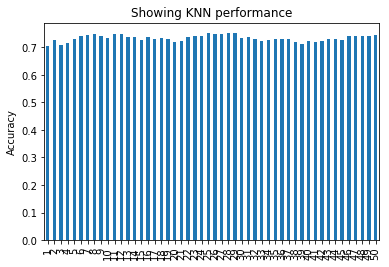

 KNN with -> mean Performance


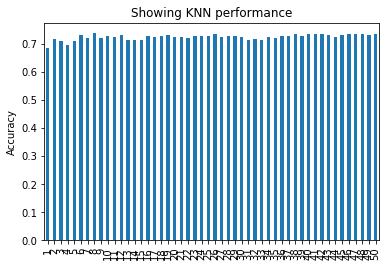

 KNN with -> median Performance


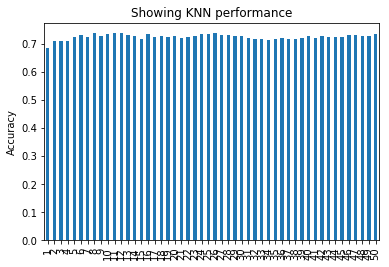

,best_k,knn_accuracy,strategy
KNN,{'n_neighbors': 25},0.752551,complete_case
KNN,{'n_neighbors': 8},0.738281,mean
KNN,{'n_neighbors': 8},0.738281,median


In [21]:
Model.fitKNNManyStrategy(dataNew, strategies, 50)

## This method uses sklearn's pipeline and is un-biased implementation for imputing with mean and median
### Result: We can see k=8 is giving 74.2 % accuracy with mean imputation and median is giving 73.9%.

 KNN with -> complete_case Performance


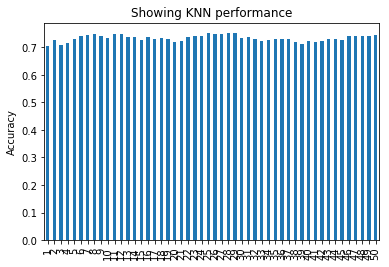

 KNN with -> mean Performance


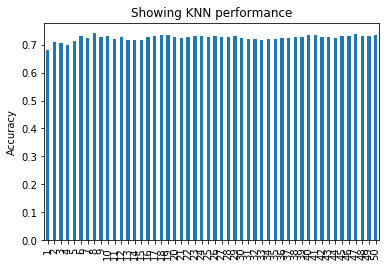

 KNN with -> median Performance


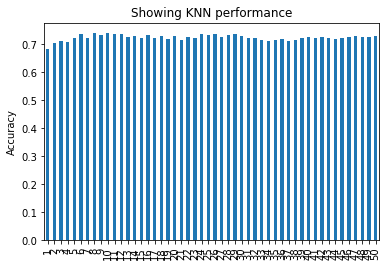

,best_k,knn_accuracy,strategy
KNN,{'classify__n_neighbors': 25},0.752551,complete_case
KNN,{'classify__n_neighbors': 8},0.742188,mean
KNN,{'classify__n_neighbors': 8},0.739583,median


In [22]:
Model.fitKNNManyStrategyUsingPipeline(dataNew, strategies, 50)

## We have not done scaling of features and for KNN scale is important
## Below graphs shows the features are on different scale

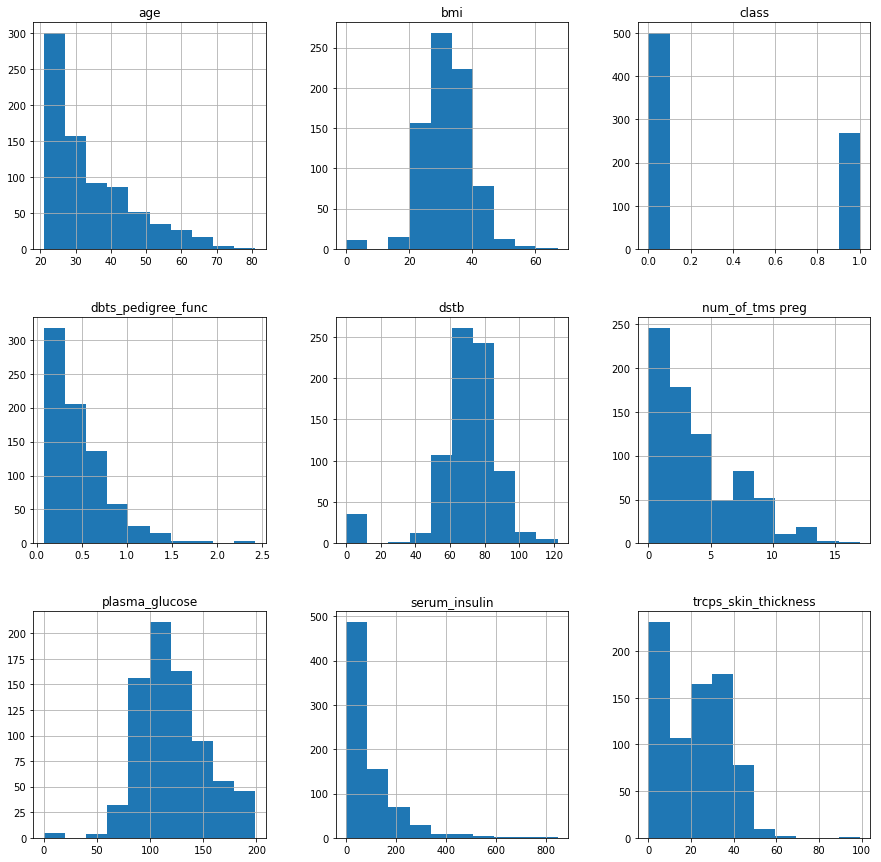

In [23]:
Visualization.createSingleVarHistPlots(data,data.columns,15,15)

## This is also apparent from mean values

In [24]:
DataSummary.returnSummaryDataFrame(data).transpose()

,col_type,count_unique,values,missing_count,count,mean,std,min,25%,50%(median),75%,max
num_of_tms preg,int64,17,[ 6. 1. 8. 0. 5. 3. 10. 2. 4. 7. 9. 11. 13. 15. 17. 12. 14.],0,768,3.84505,3.36958,0,1,3,6,17
plasma_glucose,int64,136,[148. 85. 183. 89. 137. 116. 78. 115. 197. 125. 110. 168. 139. 189.\n 166. 100. 118. 107. 103. 126. 99. 196. 119. 143. 147. 97. 145. 117.\n 109. 158. 88. 92. 122. 138. 102. 90. 111. 180. 133. 106. 171. 159.\n 146. 71. 105. 101. 176. 150. 73. 187. 84. 44. 141. 114. 95. 129.\n 79. 0. 62. 131. 112. 113. 74. 83. 136. 80. 123. 81. 134. 142.\n 144. 93. 163. 151. 96. 155. 76. 160. 124. 162. 132. 120. 173. 170.\n 128. 108. 154. 57. 156. 153. 188. 152. 104. 87. 75. 179. 130. 194.\n 181. 135. 184. 140. 177. 164. 91. 165. 86. 193. 191. 161. 167. 77.\n 182. 157. 178. 61. 98. 127. 82. 72. 172. 94. 175. 195. 68. 186.\n 198. 121. 67. 174. 199. 56. 169. 149. 65. 190.],0,768,120.895,31.9726,0,99,117,140.25,199
dstb,int64,47,[ 72. 66. 64. 40. 74. 50. 0. 70. 96. 92. 80. 60. 84. 30.\n 88. 90. 94. 76. 82. 75. 58. 78. 68. 110. 56. 62. 85. 86.\n 48. 44. 65. 108. 55. 122. 54. 52. 98. 104. 95. 46. 102. 100.\n 61. 24. 38. 106. 114.],0,768,69.1055,19.3558,0,62,72,80,122
trcps_skin_thickness,int64,51,[35. 29. 0. 23. 32. 45. 19. 47. 38. 30. 41. 33. 26. 15. 36. 11. 31. 37.\n 42. 25. 18. 24. 39. 27. 21. 34. 10. 60. 13. 20. 22. 28. 54. 40. 51. 56.\n 14. 17. 50. 44. 12. 46. 16. 7. 52. 43. 48. 8. 49. 63. 99.],0,768,20.5365,15.9522,0,0,23,32,99
serum_insulin,int64,186,[ 0. 94. 168. 88. 543. 846. 175. 230. 83. 96. 235. 146. 115. 140.\n 110. 245. 54. 192. 207. 70. 240. 82. 36. 23. 300. 342. 304. 142.\n 128. 38. 100. 90. 270. 71. 125. 176. 48. 64. 228. 76. 220. 40.\n 152. 18. 135. 495. 37. 51. 99. 145. 225. 49. 50. 92. 325. 63.\n 284. 119. 204. 155. 485. 53. 114. 105. 285. 156. 78. 130. 55. 58.\n 160. 210. 318. 44. 190. 280. 87. 271. 129. 120. 478. 56. 32. 744.\n 370. 45. 194. 680. 402. 258. 375. 150. 67. 57. 116. 278. 122. 545.\n 75. 74. 182. 360. 215. 184. 42. 132. 148. 180. 205. 85. 231. 29.\n 68. 52. 255. 171. 73. 108. 43. 167. 249. 293. 66. 465. 89. 158.\n 84. 72. 59. 81. 196. 415. 275. 165. 579. 310. 61. 474. 170. 277.\n 60. 14. 95. 237. 191. 328. 250. 480. 265. 193. 79. 86. 326. 188.\n 106. 65. 166. 274. 77. 126. 330. 600. 185. 25. 41. 272. 321. 144.\n 15. 183. 91. 46. 440. 159. 540. 200. 335. 387. 22. 291. 392. 178.\n 127. 510. 16. 112.],0,768,79.7995,115.244,0,0,30.5,127.25,846
bmi,float64,248,[33.6 26.6 23.3 28.1 43.1 25.6 31. 35.3 30.5 0. 37.6 38. 27.1 30.1\n 25.8 30. 45.8 29.6 43.3 34.6 39.3 35.4 39.8 29. 36.6 31.1 39.4 23.2\n 22.2 34.1 36. 31.6 24.8 19.9 27.6 24. 33.2 32.9 38.2 37.1 34. 40.2\n 22.7 45.4 27.4 42. 29.7 28. 39.1 19.4 24.2 24.4 33.7 34.7 23. 37.7\n 46.8 40.5 41.5 25. 25.4 32.8 32.5 42.7 19.6 28.9 28.6 43.4 35.1 32.\n 24.7 32.6 43.2 22.4 29.3 24.6 48.8 32.4 38.5 26.5 19.1 46.7 23.8 33.9\n 20.4 28.7 49.7 39. 26.1 22.5 39.6 29.5 34.3 37.4 33.3 31.2 28.2 53.2\n 34.2 26.8 55. 42.9 34.5 27.9 38.3 21.1 33.8 30.8 36.9 39.5 27.3 21.9\n 40.6 47.9 50. 25.2 40.9 37.2 44.2 29.9 31.9 28.4 43.5 32.7 67.1 45.\n 34.9 27.7 35.9 22.6 33.1 30.4 52.3 24.3 22.9 34.8 30.9 40.1 23.9 37.5\n 35.5 42.8 42.6 41.8 35.8 37.8 28.8 23.6 35.7 36.7 45.2 44. 46.2 35.\n 43.6 44.1 18.4 29.2 25.9 32.1 36.3 40. 25.1 27.5 45.6 27.8 24.9 25.3\n 37.9 27. 26. 38.7 20.8 36.1 30.7 32.3 52.9 21. 39.7 25.5 26.2 19.3\n 38.1 23.5 45.5 23.1 39.9 36.8 21.8 41. 42.2 34.4 27.2 36.5 29.8 39.2\n 38.4 36.2 48.3 20. 22.3 45.7 23.7 22.1 42.1 42.4 18.2 26.4 45.3 37.\n 24.5 32.2 59.4 21.2 26.7 30.2 46.1 41.3 38.8 35.2 42.3 40.7 46.5 33.5\n 37.3 30.3 26.3 21.7 36.4 28.5 26.9 38.6 31.3 19.5 20.1 40.8 23.4 28.3\n 38.9 57.3 35.6 49.6 44.6 24.1 44.5 41.2 49.3 46.3],0,768,31.9926,7.88416,0,27.3,32,36.6,67.1
dbts_pedigree_func,float64,517,[0.627 0.351 0.672 0.167 2.288 0.201 0.248 0.134 0.158 0.232 0.191 0.537\n 1.441 0.398 0.587 0.484 0.551 0.254 0.183 0.529 0.704 0.388 0.451 0.263\n 0.205 0.257 0.487 0.245 0.337 0.546 0.851 0.267 0.188 0.512 0.966 0.42\n 0.665 0.503 1.39 0.27

## 

 KNN with -> Data -> impute_mean -> KNN Performance


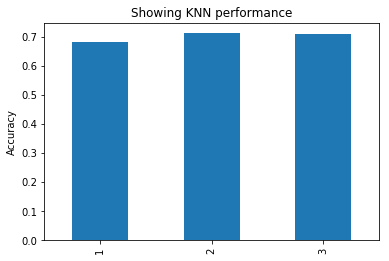

 KNN with -> Data -> impute_median -> KNN Performance


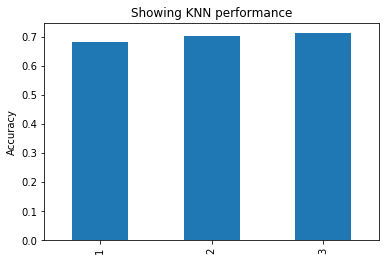

 KNN with -> Data-> complete_case-> KNN Performance


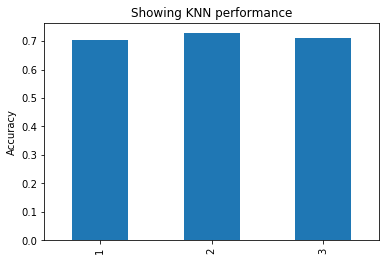

 KNN with -> Data -> impute_mean -> z_score_normalize -> KNN Performance


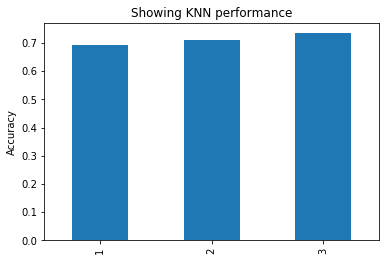

 KNN with -> Data -> impute_median -> z_score_normalize -> KNN Performance


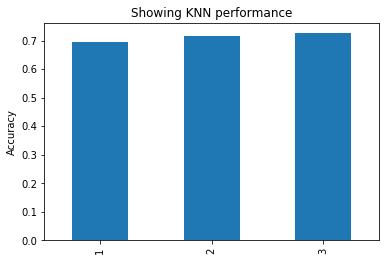

 KNN with -> Data -> complete_case -> z_score_normalize -> KNN Performance


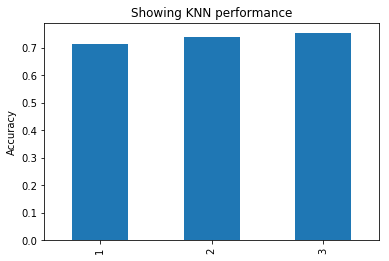

 KNN with -> Data -> impute_mean -> min_max_normalize -> KNN Performance


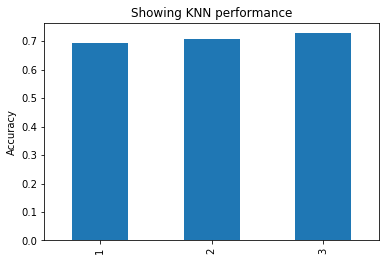

 KNN with -> Data -> impute_median -> min_max_normalize -> KNN Performance


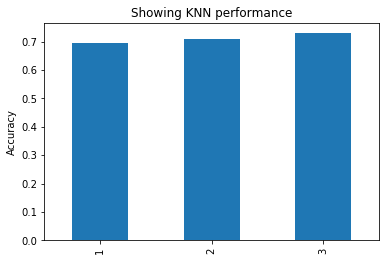

 KNN with -> Data -> complete_case -> min_max_normalize -> KNN Performance


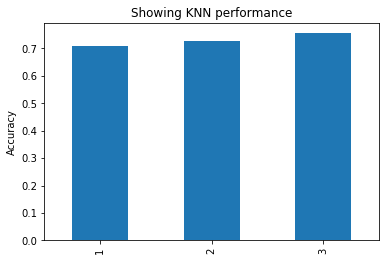

 KNN with -> Data -> impute_mean -> row_normalize -> KNN Performance


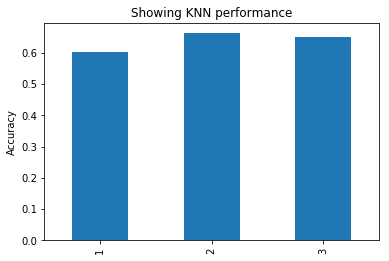

 KNN with -> Data -> impute_median -> row_normalize -> KNN Performance


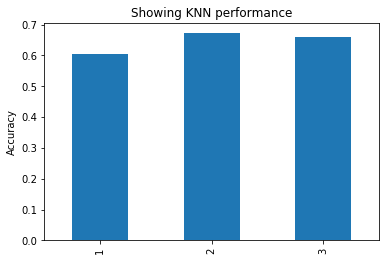

 KNN with -> Data -> complete_case -> row_normalize -> KNN Performance


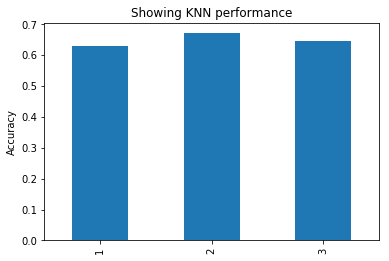

In [25]:
result=Model.fit_knn_pipelines(dataNew,Pipelines.pipelines,3)

In [28]:
result

,best_k,knn_accuracy,pipeline,pipeline_cleaned
KNN,{'classify__n_neighbors': 2},0.710938,"Pipeline(memory=None,\n steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> impute_mean -> KNN
KNN,{'classify__n_neighbors': 3},0.712240,"Pipeline(memory=None,\n steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> impute_median -> KNN
KNN,{'classify__n_neighbors': 2},0.727041,"Pipeline(memory=None,\n steps=[('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data-> complete_case-> KNN
KNN,{'classify__n_neighbors': 3},0.734375,"Pipeline(memory=None,\n steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> impute_mean -> z_score_normalize -> KNN
KNN,{'classify__n_neighbors': 3},0.725260,"Pipeline(memory=None,\n steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> impute_median -> z_score_normalize -> KNN
KNN,{'classify__n_neighbors': 3},0.752551,"Pipeline(memory=None,\n steps=[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> complete_case -> z_score_normalize -> KNN
KNN,{'classify__n_neighbors': 3},0.727865,"Pipeline(memory=None,\n steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('standardize', MinMaxScaler(copy=True, feature_range=(0, 1))), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> impute_mean -> min_max_normalize -> KNN
KNN,{'classify__n_neighbors': 3},0.729167,"Pipeline(memory=None,\n steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('standardize', MinMaxScaler(copy=True, feature_range=(0, 1))), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> impute_median -> min_max_normalize -> KNN
KNN,{'classify__n_neighbors': 3},0.755102,"Pipeline(memory=None,\n steps=[('standardize', MinMaxScaler(copy=True, feature_range=(0, 1))), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> complete_case -> min_max_normalize -> KNN
KNN,{'classify__n_neighbors': 2},0.662760,"Pipeline(memory=None,\n steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('normalize', Normalizer(copy=True, norm='l2')), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> impute_mean -> row_normalize -> KNN


 KNN with -> Data -> impute_mean -> KNN Performance


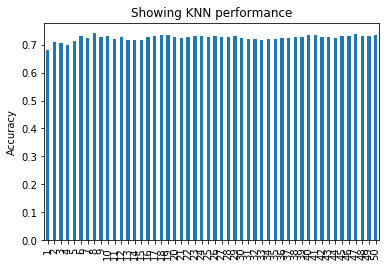

 KNN with -> Data -> impute_median -> KNN Performance


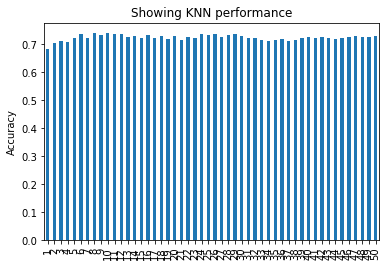

 KNN with -> Data-> complete_case-> KNN Performance


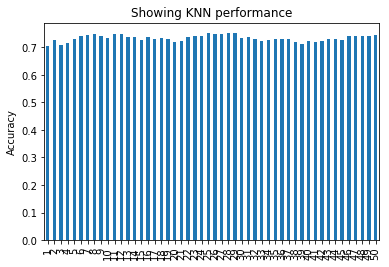

 KNN with -> Data -> impute_mean -> z_score_normalize -> KNN Performance


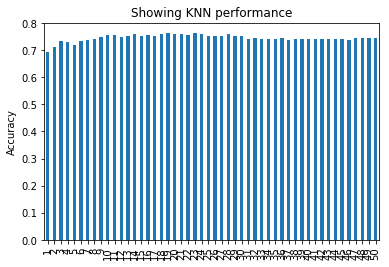

 KNN with -> Data -> impute_median -> z_score_normalize -> KNN Performance


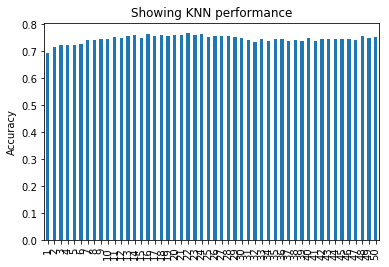

 KNN with -> Data -> complete_case -> z_score_normalize -> KNN Performance


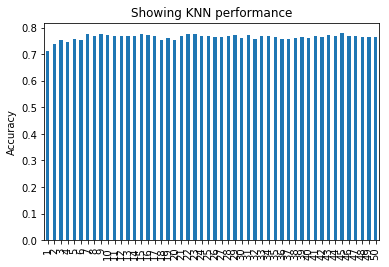

 KNN with -> Data -> impute_mean -> min_max_normalize -> KNN Performance


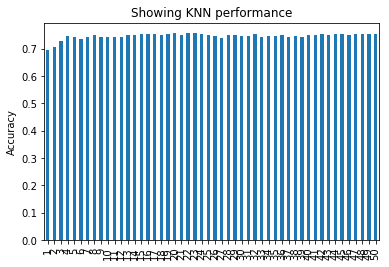

 KNN with -> Data -> impute_median -> min_max_normalize -> KNN Performance


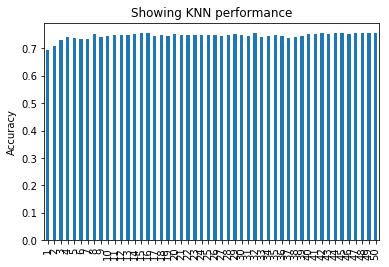

 KNN with -> Data -> complete_case -> min_max_normalize -> KNN Performance


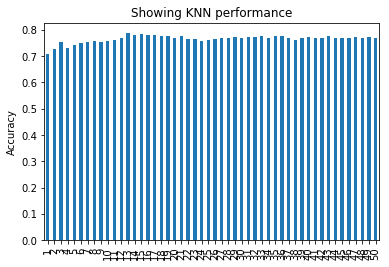

 KNN with -> Data -> impute_mean -> row_normalize -> KNN Performance


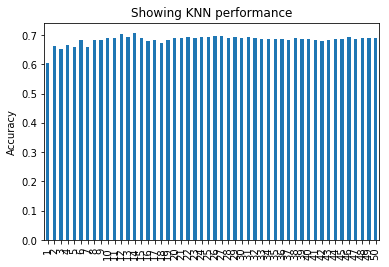

 KNN with -> Data -> impute_median -> row_normalize -> KNN Performance


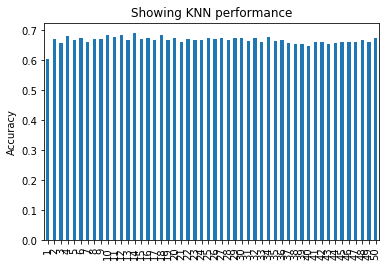

 KNN with -> Data -> complete_case -> row_normalize -> KNN Performance


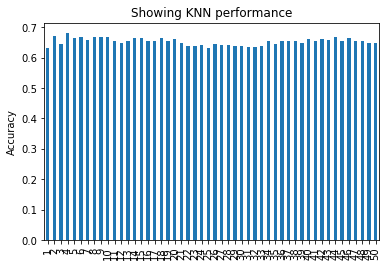

In [29]:
result=Model.fit_knn_pipelines(dataNew,Pipelines.pipelines,50)

In [30]:
result

,best_k,knn_accuracy,pipeline,pipeline_cleaned
KNN,{'classify__n_neighbors': 8},0.742188,"Pipeline(memory=None,\n steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> impute_mean -> KNN
KNN,{'classify__n_neighbors': 8},0.739583,"Pipeline(memory=None,\n steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> impute_median -> KNN
KNN,{'classify__n_neighbors': 25},0.752551,"Pipeline(memory=None,\n steps=[('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data-> complete_case-> KNN
KNN,{'classify__n_neighbors': 23},0.763021,"Pipeline(memory=None,\n steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> impute_mean -> z_score_normalize -> KNN
KNN,{'classify__n_neighbors': 22},0.768229,"Pipeline(memory=None,\n steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> impute_median -> z_score_normalize -> KNN
KNN,{'classify__n_neighbors': 45},0.780612,"Pipeline(memory=None,\n steps=[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> complete_case -> z_score_normalize -> KNN
KNN,{'classify__n_neighbors': 23},0.757812,"Pipeline(memory=None,\n steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('standardize', MinMaxScaler(copy=True, feature_range=(0, 1))), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> impute_mean -> min_max_normalize -> KNN
KNN,{'classify__n_neighbors': 42},0.756510,"Pipeline(memory=None,\n steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('standardize', MinMaxScaler(copy=True, feature_range=(0, 1))), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> impute_median -> min_max_normalize -> KNN
KNN,{'classify__n_neighbors': 13},0.788265,"Pipeline(memory=None,\n steps=[('standardize', MinMaxScaler(copy=True, feature_range=(0, 1))), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> complete_case -> min_max_normalize -> KNN
KNN,{'classify__n_neighbors': 14},0.707031,"Pipeline(memory=None,\n steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('normalize', Normalizer(copy=True, norm='l2')), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> impute_mean -> row_normalize -> KNN
